## Gradio Pets

In [1]:
!pip install -Uqq fastai

In [2]:
from fastai.vision.all import *

def is_cat(x): return x[0].isupper()

In [3]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

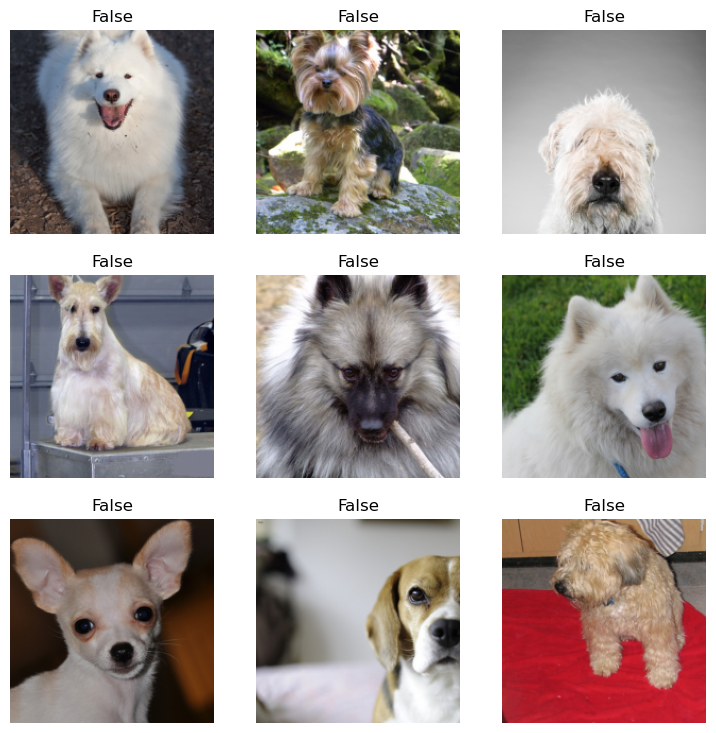

In [4]:
dls.show_batch()

In [5]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

In [6]:
learn.export('model.pkl')

In [16]:
labels = learn.dls.vocab
labels = ['dog','cat']

def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [14]:
labels = ['dog','cat']

In [ ]:
import gradio as gr
gr.Interface(fn=predict, inputs=gr.Image(height = 512, width = 512), outputs=gr.Label(num_top_classes=3)).launch(share=True)

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://9f8521e9cb03c24b48.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
